In [1]:
import numpy as np
import scipy
from matplotlib import pyplot as plt
from NI_simulation.modules import ni_sim
from scipy import interpolate

%load_ext autoreload
%autoreload 2

Text(0.5, 0, 'Frequency (Hz)')

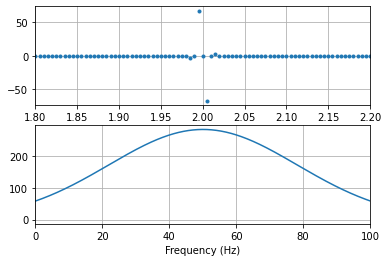

In [139]:
f0 = 50 #Hz
sig = 1/(5*f0)
w0 = 2*np.pi*f0

t = np.arange(-5,5,1/200)
x = 1/(sig*np.sqrt(2*np.pi))*np.exp(-((t-2)**2)/(2*sig)**2)*np.exp(1j*w0*(t-1))*np.exp(1j*np.pi/2)

plt.subplot(2,1,1)
plt.plot(t,np.real(x), '.')
plt.grid()
plt.xlabel('Time (s)')
plt.xlim([1.8, 2.2])
X = scipy.fft.fft(x)

f = np.linspace(-100,100,len(x))

plt.subplot(2,1,2)
plt.plot(f,scipy.fft.fftshift(np.abs(X)))
plt.xlim([0, 100])
plt.grid()
plt.xlabel('Frequency (Hz)')

(50.0, 55.0)

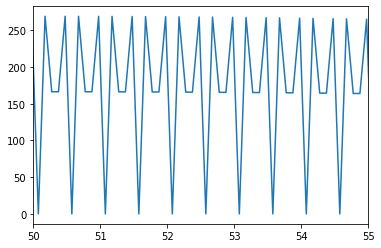

In [146]:
x_real = np.real(X)

plt.plot(f, scipy.fft.fftshift(np.abs(x_real)))
plt.xlim([50, 55])

## Experimenting with creating Cas(t) and Cbs(t)

In [45]:
# Define Environment
nodeA = [-1500,0] # (x,y) in meters
nodeB = [1500,0] # (x,y) in meters
source = [10000, 10000] # (x,y) in meters
c = 1500 # m/s

# Define Experiment Properties
Fs = 200
f0 = 50 #Hz
sig = 1/(5*f0)
w0 = 2*np.pi*f0

t = np.arange(0,60,1/Fs)

# Calculate latent variables
R_as = ((nodeA[0] - source[0])**2 + (nodeA[1] - source[1])**2)**0.5
R_bs = ((nodeB[0] - source[0])**2 + (nodeB[1] - source[1])**2)**0.5

In [58]:
def time_signal(t, r, c, sig, f0):
    x = 1/(sig*np.sqrt(2*np.pi))*np.exp(-((t-r/c)**2)/(2*sig)**2)*np.exp(1j*w0*(t-r/c))
    return x

x_as = time_signal(t, R_as, c, sig, f0)
x_bs = time_signal(t, R_bs, c, sig, f0)

r_ab = np.correlate(x_as, x_bs, mode='full')

(1.0, 2.5)

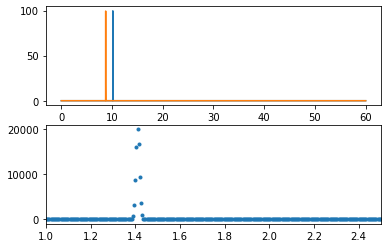

In [71]:
plt.subplot(2,1,1)
plt.plot(t, np.abs(x_as))
plt.plot(t, np.abs(x_bs))

plt.subplot(2,1,2)
t_xcorr = np.linspace(-60,60,len(r_ab))
plt.plot(t_xcorr, np.abs(r_ab),'.')
plt.xlim([1, 2.5])

In [4]:
sources = ni_sim.source_distribution().uniform(10000, 10000, 1000)

env = ni_sim.environment(sources)
xA, xB = env.get_signals()


AttributeError: 'environment' object has no attribute '_environment__get_Time_signals_gaussian'

(-10000.0, 10000.0)

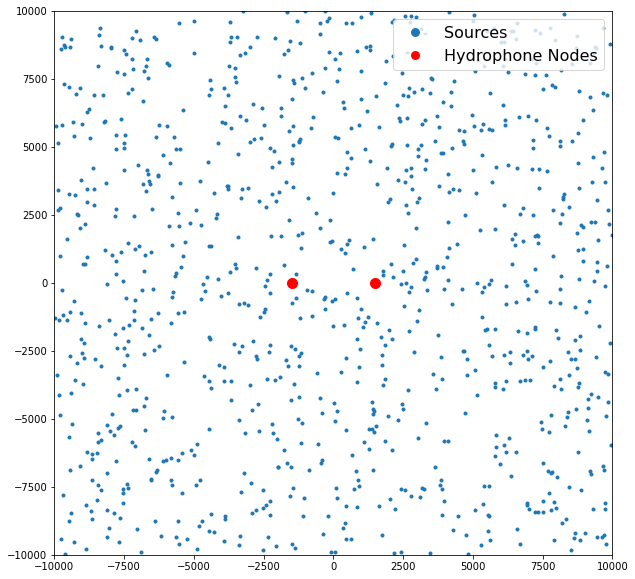

In [100]:
env.plot_env()
plt.ylim([-10000, 10000])
plt.xlim([-10000, 10000])

(-5.0, 5.0)

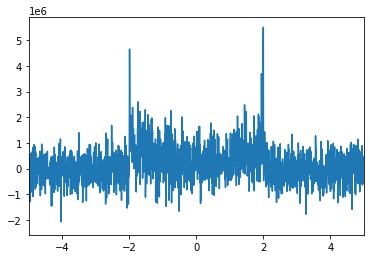

In [101]:
R = np.correlate(xA, xB, mode='full')

plt.plot(np.linspace(-env.time_length,env.time_length,len(R)),np.real(R))
plt.xlim([-5, 5])

## Playing around with Gaussian Signals

In [40]:
x = np.random.normal(0, 1, 100*200)
t = np.arange(0,100,1/200)

f = interpolate.interp1d(t, x, kind='cubic', bounds_error=False)

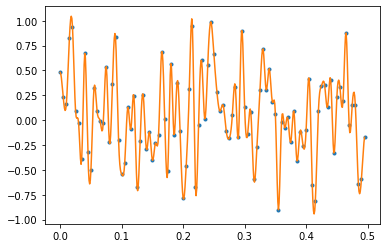

In [36]:
t_interp = np.arange(0,0.5,1/1000)
x_interp = f(t_interp)

plt.plot(t, x, '.')
plt.plot(t_interp, x_interp)


In [45]:
dt_a = 5
dt_b = 3

a = f(t-dt_a)
b = f(t-dt_b)

a[np.isnan(a)]=0
b[np.isnan(b)]=0
R = np.correlate(a,b,mode='full')


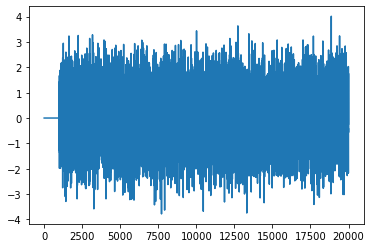

In [47]:
plt.plot(a)

## Building Multiprocessing

In [17]:
import multiprocessing as mp

In [18]:
sources = ni_sim.source_distribution().uniform(10000, 10000, 100)
env = ni_sim.environment(sources)

In [19]:
xA, xB = env.get_signals()

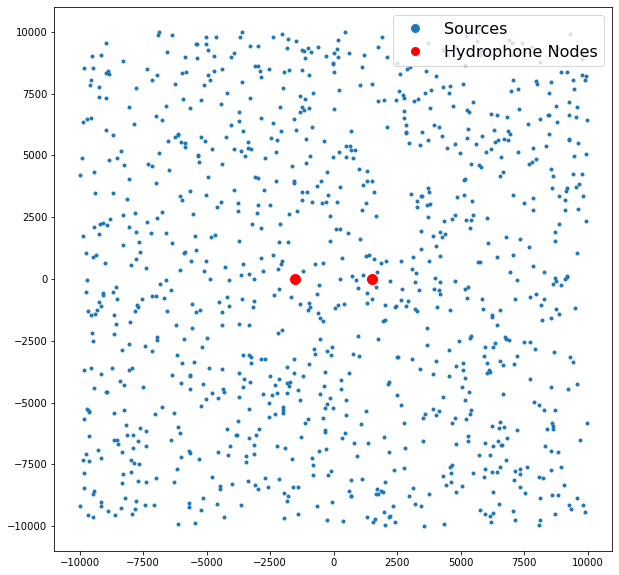

In [3]:
env.plot_env()

(-10.0, 10.0)

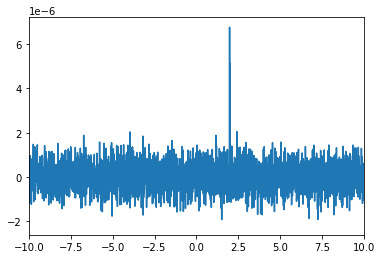

In [23]:
tx = np.linspace(-1800, 1800, len(xA)*2-1)
plt.plot(tx, np.correlate(xA, xB, mode='full'))
plt.xlim([-10,10])

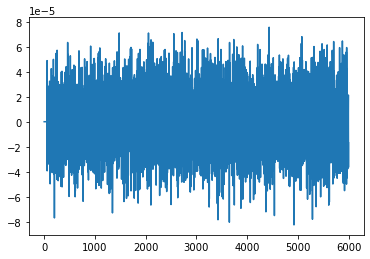

In [15]:
plt.plot(xA)

## Just getting any results

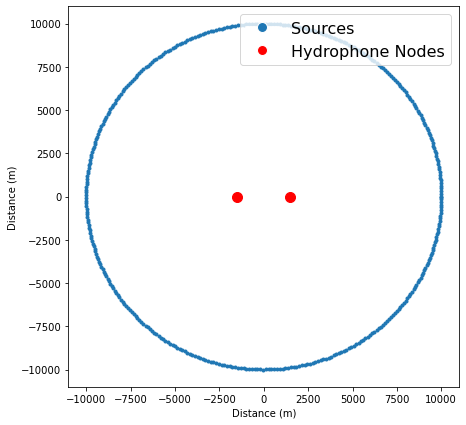

In [104]:
sources = ni_sim.source_distribution().uniform_circular(10000, [0,0], 400)
env = ni_sim.environment(sources)
fig, _ = env.plot_env()

fig.savefig('circular_env_400_sources_1hr.png', dpi=200)

In [105]:
xA, xB = env.get_signals_1cpu(sources)
R1 = np.correlate(xA, xB, mode='full')

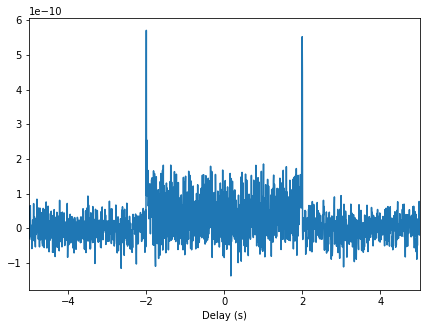

In [106]:
tx = np.linspace(-3600,3600,len(R1))
fig = plt.figure(figsize=(7,5))

plt.plot(tx, R1)
plt.xlim([-5,5])
plt.xlabel('Delay (s)')

fig.savefig('circular_nccf_400_sources_1hr.png',dpi=200)

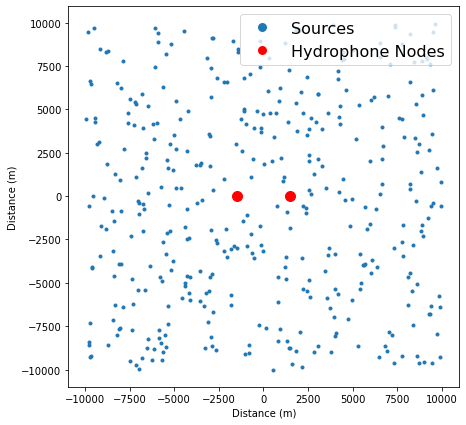

In [107]:
sources = ni_sim.source_distribution().uniform(10000, 10000, 400)
env = ni_sim.environment(sources)
fig, _ = env.plot_env()

fig.savefig('uniform_env_400_sources_1hr.png', dpi=200)

In [108]:
xA, xB = env.get_signals_1cpu(sources)
R2 = np.correlate(xA, xB, mode='full')

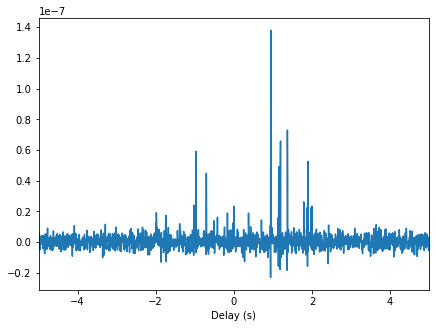

In [109]:
tx = np.linspace(-3600,3600,len(R2))
fig = plt.figure(figsize=(7,5))

plt.plot(tx, R2)
plt.xlim([-5,5])
plt.xlabel('Delay (s)')

fig.savefig('uniform_nccf_400_sources_1hr.png',dpi=200)

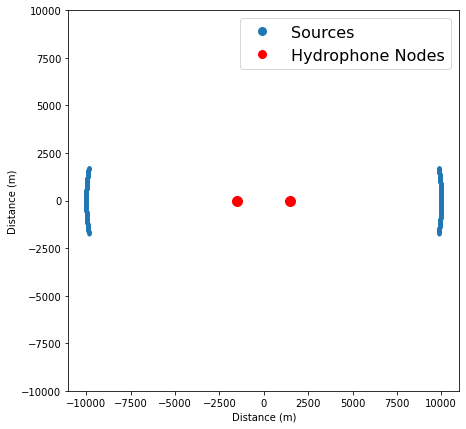

In [98]:
sources = ni_sim.source_distribution().endfire_circle(10, 10000, 400)
env = ni_sim.environment(sources)
fig, _ = env.plot_env()
plt.ylim([-10000, 10000])

fig.savefig('endfire_circle_env_400_sources_1hr.png', dpi=200)


In [99]:
xA, xB = env.get_signals_1cpu(sources)
R3 = np.correlate(xA, xB, mode='full')

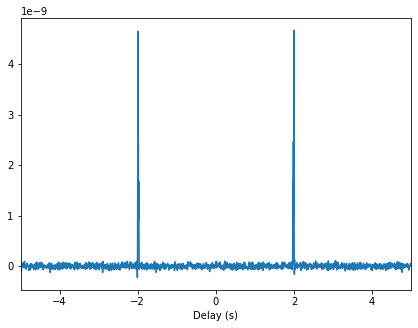

In [100]:
tx = np.linspace(-3600,3600,len(R4))
fig = plt.figure(figsize=(7,5))

plt.plot(tx, R3)
plt.xlim([-5,5])
plt.xlabel('Delay (s)')

fig.savefig('endfire_circle_nccf_400_sources_1hr.png',dpi=200)

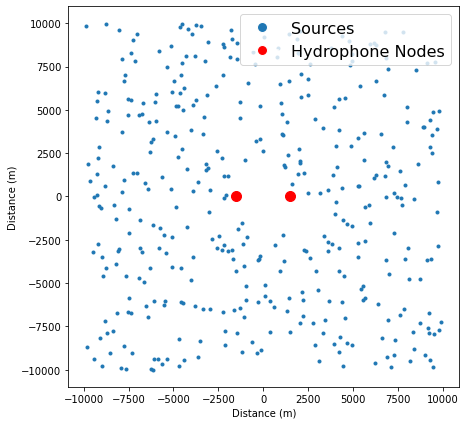

In [97]:
sources = ni_sim.source_distribution().distant_uniform(1700, 10000, 10000, 400)
env = ni_sim.environment(sources)
fig, _ = env.plot_env()

fig.savefig('distant_uniform_env_400_sources.png', dpi=200)

In [89]:
xA, xB = env.get_signals_1cpu(sources)
R4 = np.correlate(xA, xB, mode='full')

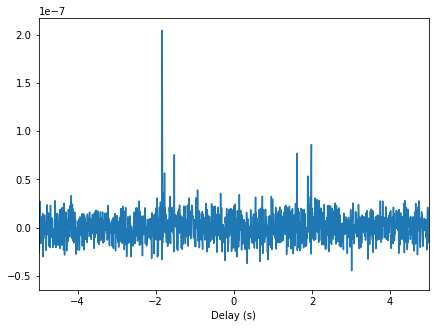

In [96]:
tx = np.linspace(-3600,3600,len(R4))
fig = plt.figure(figsize=(7,5))

plt.plot(tx, R4)
plt.xlim([-5,5])
plt.xlabel('Delay (s)')

fig.savefig('distant_uniform_nccf_400_sources.png',dpi=200)